**Modern Portfolio Theory (MPT)**

In [1]:
# !pip install empyrial

In [2]:
from empyrial import empyrial, Engine
import pandas as pd
import re

In [8]:
# From universe of stocks, categorize by beta(SPY,Xi) and Corr(SPY,Xi)
list_tickers = ['AAPL', 'ABNB', 'ABT', 'AMZN', 'CBOE', 'ECL', 'GE', 'GOOGL', 'KO', 'META', 'MMC', 'MRK', 'SPY', 'TRGP', 'VRTX', 'WDC', 'WFC', 'LDOS', 'CF', 'USB', 'CTLT', 'CNC', 'BBWI', 'WRK', 'ZION', 'MTB']


In [9]:
len(list_tickers)

26

In [10]:
date_today = pd.to_datetime('today').strftime("%Y-%m-%d")
date_start = pd.to_datetime(date_today) - pd.DateOffset(months=36)
date_start = date_start.strftime("%Y-%m-%d")
date_start, date_today

('2021-02-28', '2024-02-28')

In [11]:
portfolio = Engine(
    start_date = date_start,                                      
    portfolio = list_tickers,
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "monthly"
)

Start date: 2021-02-28
End date: 2024-02-28


,Backtest
,
Annual return,15.44%
Cumulative return,53.58%
Annual volatility,16.87 %
Winning day ratio,52.99%
Sharpe ratio,0.94
Calmar ratio,0.89
Information ratio,0.0
Stability,0.46
Max Drawdown,-17.3 %


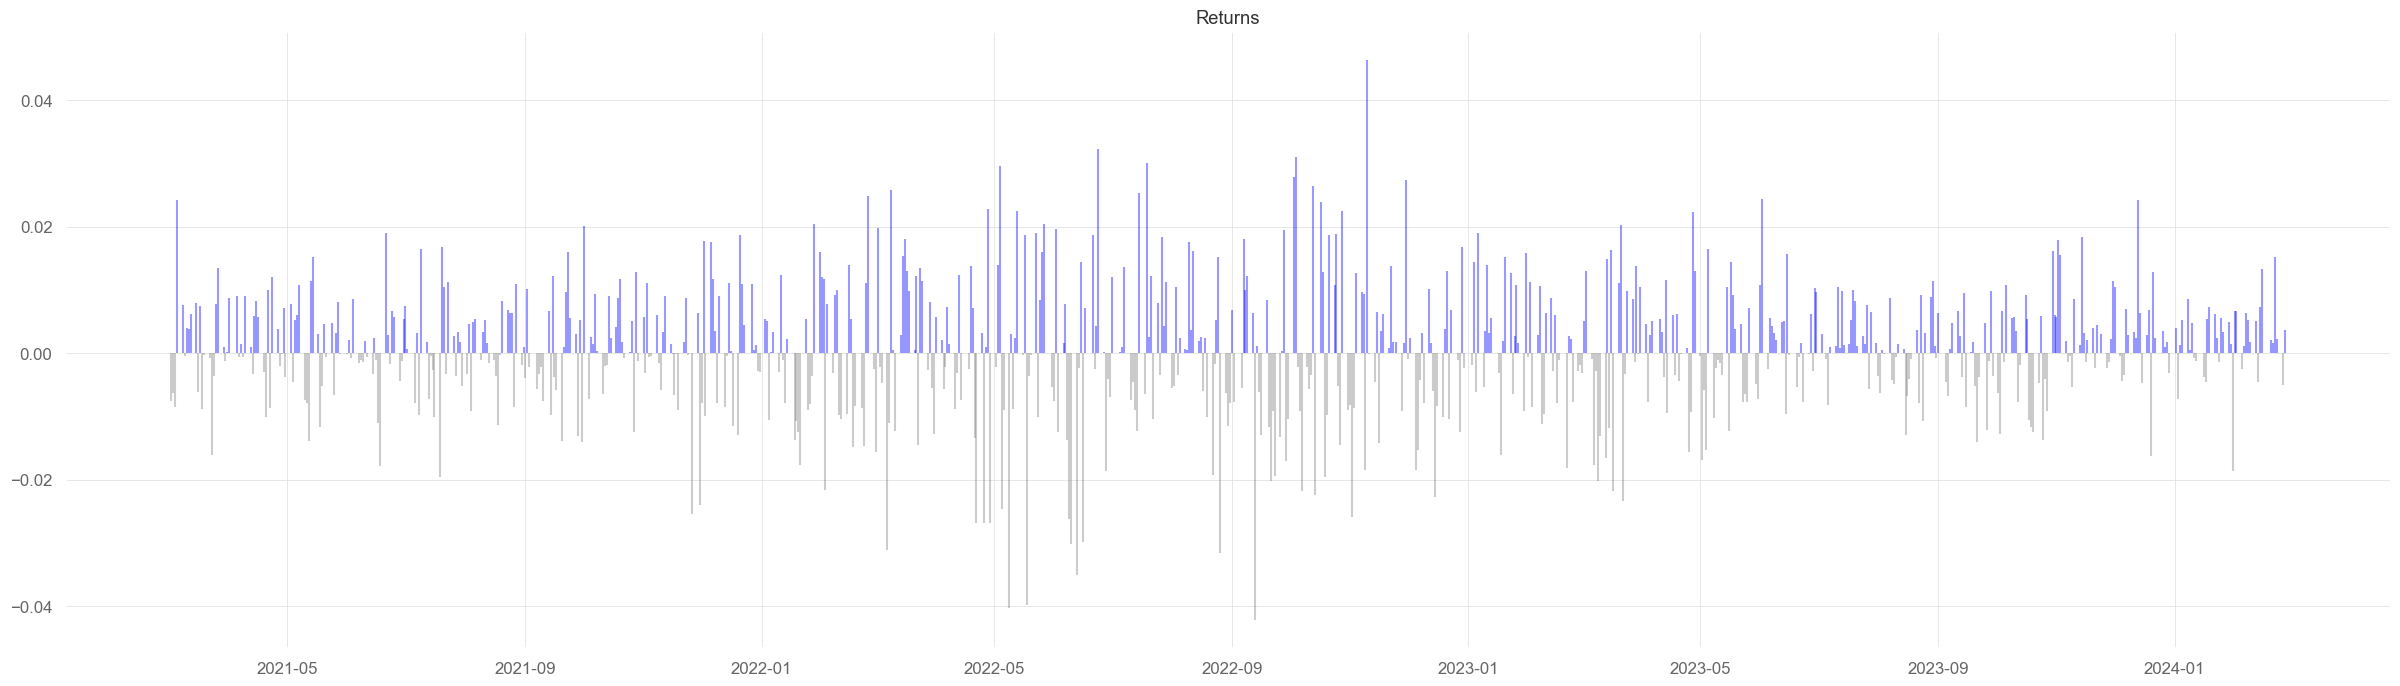

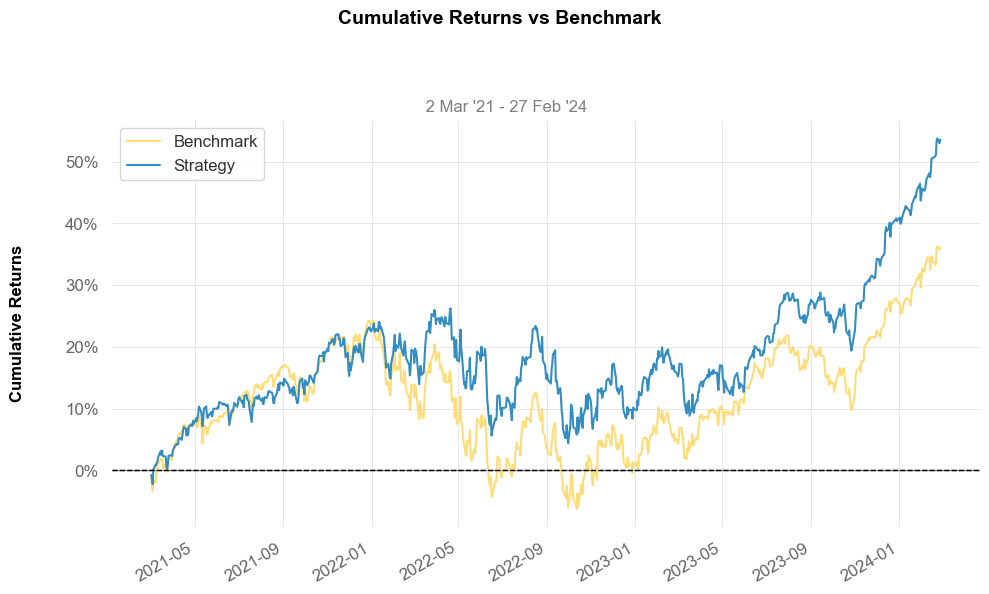

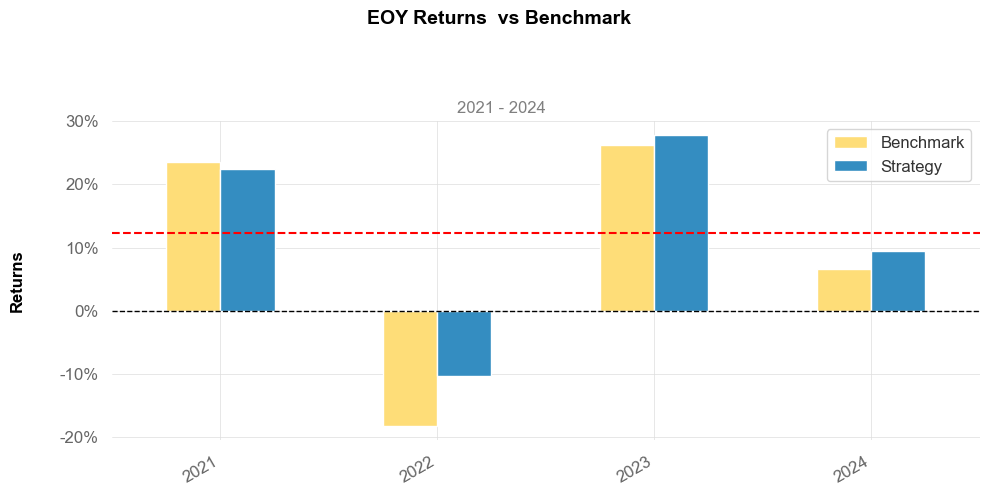

In [12]:
try:
    empyrial(portfolio)
except TypeError as e:
    pass 

# Summary of allocations

In [13]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2021-03-30,2021-04-29,2021-05-30,2021-06-29,2021-07-30,2021-08-29,2021-09-28,2021-10-29,2021-11-28,2021-12-29,...,2023-06-29,2023-07-30,2023-08-29,2023-09-28,2023-10-29,2023-11-28,2023-12-29,2024-01-28,2024-02-28,2024-02-28
AAPL,0.04248,0.04116,0.03918,0.04051,0.04075,0.04085,0.04031,0.04011,0.04038,0.04127,...,0.03713,0.03732,0.03735,0.03734,0.03768,0.03786,0.03816,0.03815,0.03839,0.03839
ABNB,0.02922,0.03573,0.03792,0.04035,0.03803,0.03730,0.03777,0.03766,0.03626,0.03311,...,0.02138,0.02148,0.02169,0.02208,0.02204,0.02213,0.02224,0.02240,0.02233,0.02233
ABT,0.04258,0.04177,0.04381,0.04468,0.04699,0.04727,0.04772,0.04723,0.04765,0.04831,...,0.04833,0.04804,0.04794,0.04771,0.04801,0.04802,0.04804,0.04787,0.04784,0.04784
AMZN,0.04545,0.04170,0.04218,0.04485,0.04689,0.04513,0.04461,0.04461,0.04425,0.04455,...,0.03058,0.03080,0.03084,0.03075,0.03092,0.03104,0.03148,0.03158,0.03158,0.03158
CBOE,0.04058,0.04074,0.04437,0.04235,0.04259,0.04346,0.04447,0.04475,0.04427,0.04442,...,0.05456,0.05412,0.05402,0.05389,0.05381,0.05378,0.05381,0.05363,0.05348,0.05348
ECL,0.04411,0.04083,0.03984,0.03962,0.04056,0.04092,0.04111,0.04023,0.04100,0.04104,...,0.03860,0.03876,0.03897,0.03906,0.03910,0.03901,0.03913,0.03917,0.03950,0.03950
GE,0.03904,0.03850,0.03656,0.03631,0.03363,0.03333,0.03282,0.03266,0.03301,0.03245,...,0.03705,0.03734,0.03725,0.03723,0.03703,0.03726,0.03752,0.03749,0.03758,0.03758
GOOGL,0.04653,0.04182,0.03962,0.04010,0.04047,0.04029,0.03999,0.04113,0.04121,0.04121,...,0.03563,0.03563,0.03555,0.03558,0.03529,0.03550,0.03605,0.03611,0.03597,0.03597
KO,0.04578,0.04611,0.04660,0.04556,0.04713,0.04676,0.04687,0.04738,0.04694,0.04735,...,0.05712,0.05665,0.05638,0.05608,0.05581,0.05569,0.05550,0.05523,0.05506,0.05506
META,0.04193,0.03917,0.03784,0.03898,0.03837,0.03864,0.03961,0.03949,0.03948,0.03855,...,0.02255,0.02308,0.02320,0.02353,0.02374,0.02420,0.02487,0.02510,0.02481,0.02481


In [14]:
print("Summary of the portfolio at the most recent date:") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

Summary of the portfolio at the most recent date:


,2024-02-28
AAPL,0.03839
ABNB,0.02233
ABT,0.04784
AMZN,0.03158
CBOE,0.05348
ECL,0.03950
GE,0.03758
GOOGL,0.03597
KO,0.05506
META,0.02481
